<a href="https://colab.research.google.com/github/skashish-23/Energy-Consumption-Dashboard/blob/main/EnergyConsumptionDashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Consumption Dashboard

This program generates a dashboard to visualise real-time energy consumption of a household. Some energy data already exists, but new synthetic data is generated in real-time (based on this existing data) and visualised to mimic real-time energy profile of a house.

A synthetic data generator (GAN) will be used. REST API will allow real-time transfer of this data to the main program. The main program will visualise this data.

project/

│

├── main_program/

│   ├── main.py

│   ├── visualization.py (**might not be necessary**)

│   └── requirements.txt

│

└── server/

      ├── server.py

      ├── data_generation.py

      └── requirements.txt

# Main program
It will fetch data from the server and visualise it. The "entry point" of the program.
**main.py**

In [ ]:
import matplotlib.pyplot as plt
import requests
import json
import time
from flask import Flask, jsonify
#from flask_restful import Api, Resource
import pandas as pd
import numpy as np

In [ ]:
def fetch_data_from_server():
  #make GET request
  response = requests.get("URL of server")
  data = response.json()
  return data

In [ ]:
def update_visualisation(data):
  plt.figure(figsize=(6,8))
  plt.plot(data)
  plt.xlabel('Time')
  plt.ylabel('Energy consumed')
  plt.grid(True)
  plt.show()

In [ ]:
def main():
  while True:
    real_time_data = fetch_data_from_server()
    update_visualisation(real_time_data)
    time.sleep(5)

# Server

In [ ]:
#server.py
from flask import Flask, jsonify
import numpy as np
import time

In [ ]:
app = Flask(__name__)

In [ ]:
def generate_synthetic_data():
  #enter code for GAN here

In [ ]:
@app.route('/generate_data', methods=['GET'])

def generate_data():
  new_data = generate_synthetic_data()
  time.sleep(300)
  return jsonify({'Data:' new_data})

In [ ]:
if __name__ = "__main__":
  app.run

Synthetic data generation using GAN

**Attribute Information**

**date**: Date in format dd/mm/yyyy

**time**: time in format hh:mm:ss

**global_active_power**: household global
minute-averaged active power (in kilowatt)

**global_reactive_power**: household global
minute-averaged reactive power (in kilowatt)

**voltage**: minute-averaged voltage (in volt)

**global_intensity**: household global
minute-averaged current intensity (in ampere)

**sub_metering_1**: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

**sub_metering_2**: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

**sub_metering_3**: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

**Notes**

(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

The dataset contains some missing values in the measurements (nearly 1.25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

In [ ]:
df = pd.read_csv('https://query.data.world/s/mp75kvfb6omoznlagidieqru6v4irh?dws=00000', date_parser=['Date'], dayfirst=True)

In [ ]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...
260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0


In [ ]:
df = df.replace('?', np.nan)

In [ ]:
columns_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[columns_to_convert] = df[columns_to_convert].astype(float)

In [ ]:
missing_values = df.isna().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
Date                        0
Time                        0
Global_active_power      3771
Global_reactive_power    3771
Voltage                  3771
Global_intensity         3771
Sub_metering_1           3771
Sub_metering_2           3771
Sub_metering_3           3771
dtype: int64


In [ ]:
missing_values_index = df[df.isna().any(axis=1)].index
print("Indices of missing values:")
print(missing_values_index)

Indices of missing values:
Int64Index([ 19836,  39913,  76258,  76259, 120592, 168501, 168502, 168503,
            168504, 168505,
            ...
            230065, 230066, 230067, 230068, 230069, 230070, 230071, 244094,
            244095, 258359],
           dtype='int64', length=3771)


In [ ]:
missing_rows = df.loc[missing_values_index]
missing_rows

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
19836,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39913,28/1/2007,17:13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76258,22/2/2007,22:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76259,22/2/2007,22:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120592,25/3/2007,17:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
230070,9/6/07,18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230071,9/6/07,18:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244094,19/6/2007,12:14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244095,19/6/2007,12:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
260635,30/6/2007,23:55:00,2.880,0.360,239.01,12.0,0.0,0.0,18.0
260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0.0,0.0,17.0
260637,30/6/2007,23:57:00,2.882,0.280,239.05,12.0,0.0,0.0,18.0
260638,30/6/2007,23:58:00,2.660,0.290,238.98,11.2,0.0,0.0,18.0


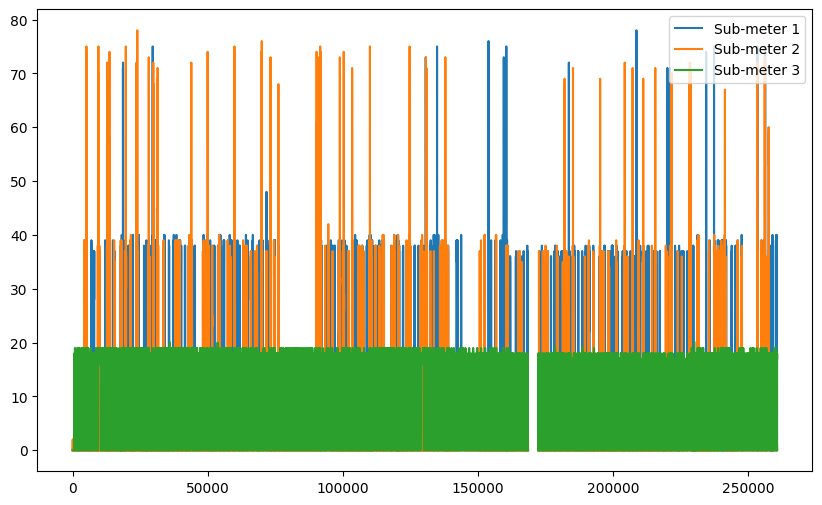

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Sub_metering_1'], label = 'Sub-meter 1')
plt.plot(df['Sub_metering_2'], label = 'Sub-meter 2')
plt.plot(df['Sub_metering_3'], label = 'Sub-meter 3')
plt.legend()
plt.show()